In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier


Using TensorFlow backend.


In [2]:
seed=42
np.random.seed(seed)

In [3]:
df=pd.read_csv('sonar.csv',header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [6]:
df.shape

(208, 61)

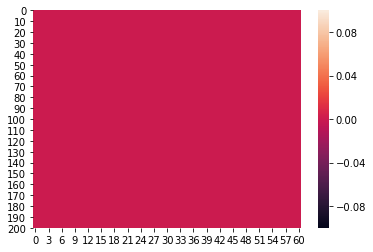

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


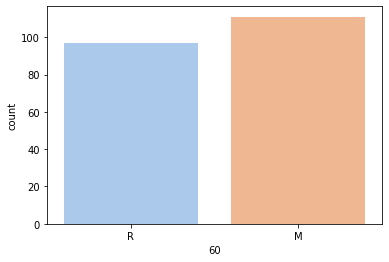

In [10]:
sns.countplot(df[60],palette='pastel')

In [ ]:
sns.pairplot(df,hue=60)

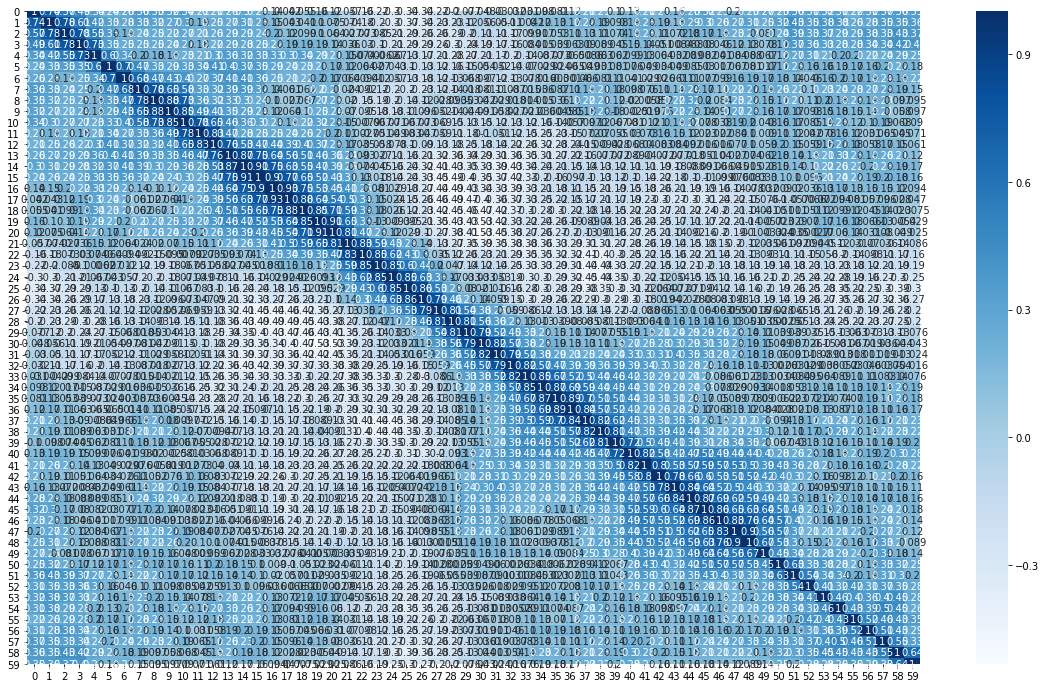

In [30]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [13]:
y=df[60]
x=df.drop(60,axis=1)

In [14]:
y.shape,x.shape

((208,), (208, 60))

In [15]:
le=LabelEncoder()

In [16]:
y=le.fit_transform(y)

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)


In [18]:
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.fit_transform(xtest)

In [19]:
#baseline model

In [20]:
def baseline_model():
    model=Sequential()
    model.add(Dense(60,activation='relu',init='normal',input_dim=xtrain.shape[1]))
    model.add(Dense(1,activation='sigmoid',init='normal',))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [21]:
estimator=KerasClassifier(build_fn=baseline_model,batch_size=5,epochs=100,verbose=1)
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
scores=cross_val_score(estimator,xtrain,ytrain,cv=kfold)

Epoch 1/100
148/148 [==============================] - 7s 49ms/step - loss: 0.6665 - accuracy: 0.6554
Epoch 2/100
148/148 [==============================] - 0s 353us/step - loss: 0.5881 - accuracy: 0.8041
Epoch 3/100
148/148 [==============================] - 0s 507us/step - loss: 0.5055 - accuracy: 0.8378
Epoch 4/100
148/148 [==============================] - 0s 422us/step - loss: 0.4244 - accuracy: 0.8514
Epoch 5/100
148/148 [==============================] - 0s 317us/step - loss: 0.3556 - accuracy: 0.8784
Epoch 6/100
148/148 [==============================] - 0s 422us/step - loss: 0.3070 - accuracy: 0.8919
Epoch 7/100
148/148 [==============================] - 0s 317us/step - loss: 0.2632 - accuracy: 0.9189
Epoch 8/100
148/148 [==============================] - 0s 422us/step - loss: 0.2292 - accuracy: 0.9527
Epoch 9/100
148/148 [==============================] - 0s 317us/step - loss: 0.1970 - accuracy: 0.9730
Epoch 10/100
148/148 [==============================] - 0s 317us/step - lo

148/148 [==============================] - 0s 317us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 80/100
148/148 [==============================] - 0s 317us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 81/100
148/148 [==============================] - 0s 317us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 82/100
148/148 [==============================] - 0s 633us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 83/100
148/148 [==============================] - 0s 528us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 84/100
148/148 [==============================] - 0s 615us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 85/100
148/148 [==============================] - 0s 633us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 86/100
148/148 [==============================] - 0s 720us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 87/100
148/148 [==============================] - 0s 528us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 88/100
148/148 [==============================] - 0s 354us/step - loss:

149/149 [==============================] - 0s 315us/step - loss: 0.0038 - accuracy: 1.0000
Epoch 57/100
149/149 [==============================] - 0s 296us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 58/100
149/149 [==============================] - 0s 315us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 59/100
149/149 [==============================] - 0s 315us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 60/100
149/149 [==============================] - 0s 315us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 61/100
149/149 [==============================] - 0s 315us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 62/100
149/149 [==============================] - 0s 315us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 63/100
149/149 [==============================] - 0s 629us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 64/100
149/149 [==============================] - 0s 635us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 65/100
149/149 [==============================] - 0s 590us/step - loss:

149/149 [==============================] - 0s 505us/step - loss: 0.0156 - accuracy: 1.0000
Epoch 35/100
149/149 [==============================] - 0s 622us/step - loss: 0.0147 - accuracy: 1.0000
Epoch 36/100
149/149 [==============================] - 0s 419us/step - loss: 0.0135 - accuracy: 1.0000
Epoch 37/100
149/149 [==============================] - 0s 720us/step - loss: 0.0126 - accuracy: 1.0000
Epoch 38/100
149/149 [==============================] - 0s 524us/step - loss: 0.0119 - accuracy: 1.0000
Epoch 39/100
149/149 [==============================] - 0s 419us/step - loss: 0.0110 - accuracy: 1.0000
Epoch 40/100
149/149 [==============================] - 0s 471us/step - loss: 0.0105 - accuracy: 1.0000
Epoch 41/100
149/149 [==============================] - 0s 532us/step - loss: 0.0098 - accuracy: 1.0000
Epoch 42/100
149/149 [==============================] - 0s 694us/step - loss: 0.0093 - accuracy: 1.0000
Epoch 43/100
149/149 [==============================] - 0s 419us/step - loss:

149/149 [==============================] - 0s 524us/step - loss: 0.1422 - accuracy: 0.9799
Epoch 13/100
149/149 [==============================] - 0s 603us/step - loss: 0.1246 - accuracy: 0.9866
Epoch 14/100
149/149 [==============================] - 0s 629us/step - loss: 0.1088 - accuracy: 0.9933
Epoch 15/100
149/149 [==============================] - 0s 524us/step - loss: 0.0961 - accuracy: 0.9933
Epoch 16/100
149/149 [==============================] - 0s 524us/step - loss: 0.0842 - accuracy: 1.0000
Epoch 17/100
149/149 [==============================] - 0s 524us/step - loss: 0.0760 - accuracy: 1.0000
Epoch 18/100
149/149 [==============================] - 0s 611us/step - loss: 0.0662 - accuracy: 1.0000
Epoch 19/100
149/149 [==============================] - 0s 629us/step - loss: 0.0589 - accuracy: 1.0000
Epoch 20/100
149/149 [==============================] - 0s 524us/step - loss: 0.0525 - accuracy: 1.0000
Epoch 21/100
149/149 [==============================] - 1s 10ms/step - loss: 

149/149 [==============================] - 0s 276us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 91/100
149/149 [==============================] - 0s 315us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 92/100
149/149 [==============================] - 0s 315us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 93/100
149/149 [==============================] - 0s 419us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 94/100
149/149 [==============================] - 0s 524us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 95/100
149/149 [==============================] - 0s 629us/step - loss: 0.0011 - accuracy: 1.0000
Epoch 96/100
149/149 [==============================] - 0s 315us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 97/100
149/149 [==============================] - 0s 315us/step - loss: 0.0010 - accuracy: 1.0000
Epoch 98/100
149/149 [==============================] - 0s 315us/step - loss: 9.8884e-04 - accuracy: 1.0000
Epoch 99/100
149/149 [==============================] - 0s 315us/step - l

149/149 [==============================] - 0s 315us/step - loss: 0.0025 - accuracy: 1.0000
Epoch 68/100
149/149 [==============================] - 0s 543us/step - loss: 0.0024 - accuracy: 1.0000
Epoch 69/100
149/149 [==============================] - 0s 577us/step - loss: 0.0023 - accuracy: 1.0000
Epoch 70/100
149/149 [==============================] - 0s 315us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 71/100
149/149 [==============================] - 0s 315us/step - loss: 0.0022 - accuracy: 1.0000
Epoch 72/100
149/149 [==============================] - 0s 293us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 73/100
149/149 [==============================] - 0s 315us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 74/100
149/149 [==============================] - 0s 315us/step - loss: 0.0020 - accuracy: 1.0000
Epoch 75/100
149/149 [==============================] - 0s 418us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 76/100
149/149 [==============================] - 0s 1ms/step - loss: 0

150/150 [==============================] - 0s 312us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 46/100
150/150 [==============================] - 0s 312us/step - loss: 0.0069 - accuracy: 1.0000
Epoch 47/100
150/150 [==============================] - 0s 312us/step - loss: 0.0065 - accuracy: 1.0000
Epoch 48/100
150/150 [==============================] - 0s 312us/step - loss: 0.0062 - accuracy: 1.0000
Epoch 49/100
150/150 [==============================] - 0s 312us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 50/100
150/150 [==============================] - 0s 312us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 51/100
150/150 [==============================] - 0s 396us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 52/100
150/150 [==============================] - 0s 312us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 53/100
150/150 [==============================] - 0s 521us/step - loss: 0.0048 - accuracy: 1.0000
Epoch 54/100
150/150 [==============================] - 0s 503us/step - loss:

150/150 [==============================] - 0s 312us/step - loss: 0.0394 - accuracy: 1.0000
Epoch 24/100
150/150 [==============================] - 0s 396us/step - loss: 0.0358 - accuracy: 1.0000
Epoch 25/100
150/150 [==============================] - 0s 509us/step - loss: 0.0325 - accuracy: 1.0000
Epoch 26/100
150/150 [==============================] - 0s 462us/step - loss: 0.0297 - accuracy: 1.0000
Epoch 27/100
150/150 [==============================] - 0s 461us/step - loss: 0.0269 - accuracy: 1.0000
Epoch 28/100
150/150 [==============================] - 0s 312us/step - loss: 0.0247 - accuracy: 1.0000
Epoch 29/100
150/150 [==============================] - 0s 521us/step - loss: 0.0226 - accuracy: 1.0000
Epoch 30/100
150/150 [==============================] - 0s 521us/step - loss: 0.0209 - accuracy: 1.0000
Epoch 31/100
150/150 [==============================] - 0s 312us/step - loss: 0.0192 - accuracy: 1.0000
Epoch 32/100
150/150 [==============================] - 0s 312us/step - loss:

150/150 [==============================] - 1s 4ms/step - loss: 0.6608 - accuracy: 0.6133
Epoch 2/100
150/150 [==============================] - 0s 313us/step - loss: 0.5763 - accuracy: 0.7733
Epoch 3/100
150/150 [==============================] - 0s 289us/step - loss: 0.4846 - accuracy: 0.8267
Epoch 4/100
150/150 [==============================] - 0s 312us/step - loss: 0.4071 - accuracy: 0.8333
Epoch 5/100
150/150 [==============================] - 0s 312us/step - loss: 0.3448 - accuracy: 0.8533
Epoch 6/100
150/150 [==============================] - 0s 312us/step - loss: 0.3008 - accuracy: 0.8800
Epoch 7/100
150/150 [==============================] - 0s 521us/step - loss: 0.2636 - accuracy: 0.9200
Epoch 8/100
150/150 [==============================] - 0s 312us/step - loss: 0.2346 - accuracy: 0.9400
Epoch 9/100
150/150 [==============================] - 0s 625us/step - loss: 0.2059 - accuracy: 0.9600
Epoch 10/100
150/150 [==============================] - 0s 625us/step - loss: 0.1834 - 

150/150 [==============================] - 0s 417us/step - loss: 0.0019 - accuracy: 1.0000
Epoch 81/100
150/150 [==============================] - 0s 521us/step - loss: 0.0018 - accuracy: 1.0000
Epoch 82/100
150/150 [==============================] - 0s 491us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 83/100
150/150 [==============================] - 0s 630us/step - loss: 0.0017 - accuracy: 1.0000
Epoch 84/100
150/150 [==============================] - 0s 579us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 85/100
150/150 [==============================] - 0s 560us/step - loss: 0.0016 - accuracy: 1.0000
Epoch 86/100
150/150 [==============================] - 0s 625us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 87/100
150/150 [==============================] - 0s 312us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 88/100
150/150 [==============================] - 0s 312us/step - loss: 0.0014 - accuracy: 1.0000
Epoch 89/100
150/150 [==============================] - 0s 417us/step - loss:

150/150 [==============================] - 0s 293us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 59/100
150/150 [==============================] - 0s 312us/step - loss: 0.0037 - accuracy: 1.0000
Epoch 60/100
150/150 [==============================] - 0s 312us/step - loss: 0.0036 - accuracy: 1.0000
Epoch 61/100
150/150 [==============================] - 0s 299us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 62/100
150/150 [==============================] - 0s 321us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 63/100
150/150 [==============================] - 0s 312us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 64/100
150/150 [==============================] - 0s 521us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 65/100
150/150 [==============================] - 0s 521us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 66/100
150/150 [==============================] - 0s 521us/step - loss: 0.0028 - accuracy: 1.0000
Epoch 67/100
150/150 [==============================] - 0s 312us/step - loss:

150/150 [==============================] - 0s 395us/step - loss: 0.0128 - accuracy: 1.0000
Epoch 37/100
150/150 [==============================] - 0s 312us/step - loss: 0.0120 - accuracy: 1.0000
Epoch 38/100
150/150 [==============================] - 0s 312us/step - loss: 0.0112 - accuracy: 1.0000
Epoch 39/100
150/150 [==============================] - 0s 312us/step - loss: 0.0106 - accuracy: 1.0000
Epoch 40/100
150/150 [==============================] - 0s 293us/step - loss: 0.0100 - accuracy: 1.0000
Epoch 41/100
150/150 [==============================] - 0s 312us/step - loss: 0.0093 - accuracy: 1.0000
Epoch 42/100
150/150 [==============================] - 0s 521us/step - loss: 0.0088 - accuracy: 1.0000
Epoch 43/100
150/150 [==============================] - 0s 937us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 44/100
150/150 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 45/100
150/150 [==============================] - 0s 521us/step - loss: 0

In [22]:
print(scores.mean())

0.8491830110549927


In [23]:
print(scores.std())

0.06957331327114256


In [24]:
estimator.fit(xtrain,ytrain,epochs=50,batch_size=5,verbose=1)

Epoch 1/50
166/166 [==============================] - 1s 4ms/step - loss: 0.6517 - accuracy: 0.6747
Epoch 2/50
166/166 [==============================] - 0s 282us/step - loss: 0.5603 - accuracy: 0.7952
Epoch 3/50
166/166 [==============================] - 0s 282us/step - loss: 0.4718 - accuracy: 0.8373
Epoch 4/50
166/166 [==============================] - 0s 282us/step - loss: 0.3996 - accuracy: 0.8735
Epoch 5/50
166/166 [==============================] - 0s 282us/step - loss: 0.3361 - accuracy: 0.8976
Epoch 6/50
166/166 [==============================] - 0s 409us/step - loss: 0.2867 - accuracy: 0.9157
Epoch 7/50
166/166 [==============================] - 0s 300us/step - loss: 0.2457 - accuracy: 0.9578
Epoch 8/50
166/166 [==============================] - 0s 471us/step - loss: 0.2121 - accuracy: 0.9639
Epoch 9/50
166/166 [==============================] - 0s 471us/step - loss: 0.1813 - accuracy: 0.9759
Epoch 10/50
166/166 [==============================] - 0s 547us/step - loss: 0.1615 

In [25]:
pred=estimator.predict(xtest)

42/42 [==============================] - 0s 2ms/step


In [26]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.83      0.94      0.88        16

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42



In [27]:
print(confusion_matrix(ytest,pred))

[[23  3]
 [ 1 15]]


In [28]:
# Model Tuning